In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [10]:
# Read the Data
toyoto=pd.read_csv("/home/aman/Downloads/Data science material/Multiple regression/Toyoto_Corrola.csv")
toyoto.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [11]:
toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [12]:
# Check the missing value
toyoto.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [13]:
toyoto.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


# Scatterplot between variables along with histograms

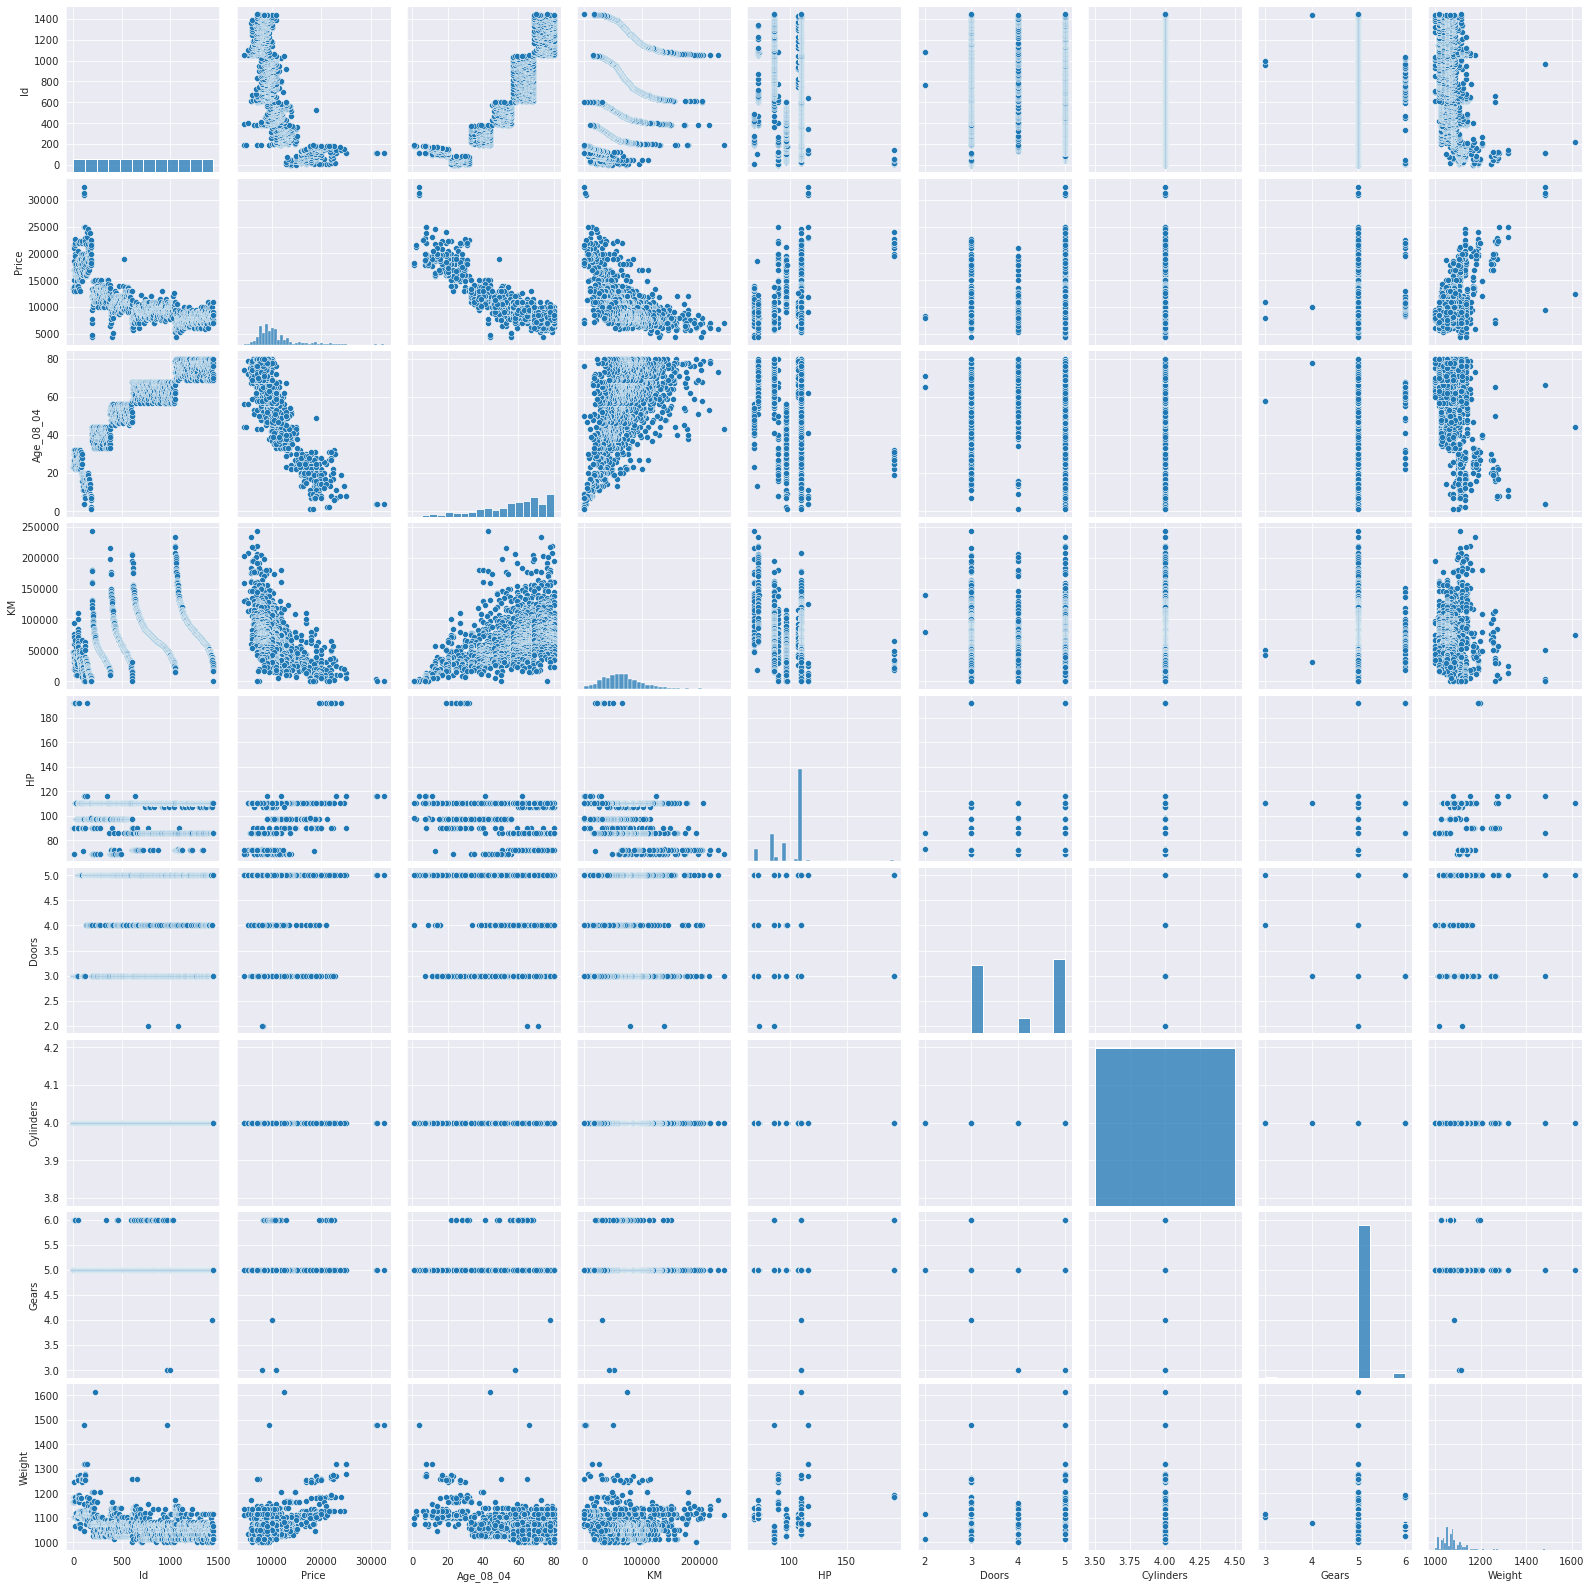

In [14]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyoto)

# Preparing model

In [16]:
# Build model- Model	Price	Age_08_04	KM	HP	Doors	Cylinders	Gears	Weight
import statsmodels.formula.api as smf
model= smf.ols('Price~Age_08_04+KM++HP+Doors+Cylinders+Gears+Weight', data=toyoto).fit()

In [18]:
# Coefficient
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [20]:
# t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [21]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

# Calculating VIF

In [27]:
rsq_age = smf.ols('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight', data=toyoto).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight', data=toyoto).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+Doors+Cylinders+Gears+Weight', data=toyoto).fit().rsquared
vif_hp= 1/(1-rsq_hp)

rsq_doors= smf.ols('Doors~Age_08_04+KM+HP+Cylinders+Gears+Weight', data=toyoto).fit().rsquared
vif_doors= 1/(1-rsq_doors)

rsq_cylinders= smf.ols('Cylinders~Age_08_04+KM+HP+Doors+Gears+Weight', data=toyoto).fit().rsquared
vif_cylinders = 1/(1-rsq_cylinders)

rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+Doors+Cylinders+Weight', data=toyoto).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+Doors+Cylinders+Gears', data=toyoto).fit().rsquared
vif_weight = 1/(1-rsq_weight)

# Storing vif values in data frame
d1 = {'Variables': ['Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'], 'VIF': [vif_age, vif_km, vif_hp, vif_doors, vif_cylinders, vif_gears, vif_weight]}
vif_frame = pd.DataFrame(d1)

vif_frame

,Variables,VIF
0,Age_08_04,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

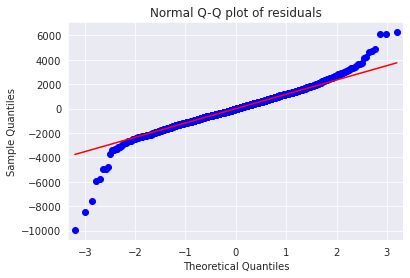

In [28]:
import statsmodels.api as sm
qqplot= sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

## Residual Plot for Homoscedasticity

In [29]:
def get_standardized_values( vals ):
    return(vals - vals.mean())/vals.std()

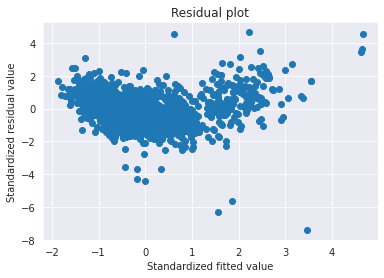

In [33]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized fitted value')
plt.ylabel('Standardized residual value')
plt.show()

## Residual Vs Regressors

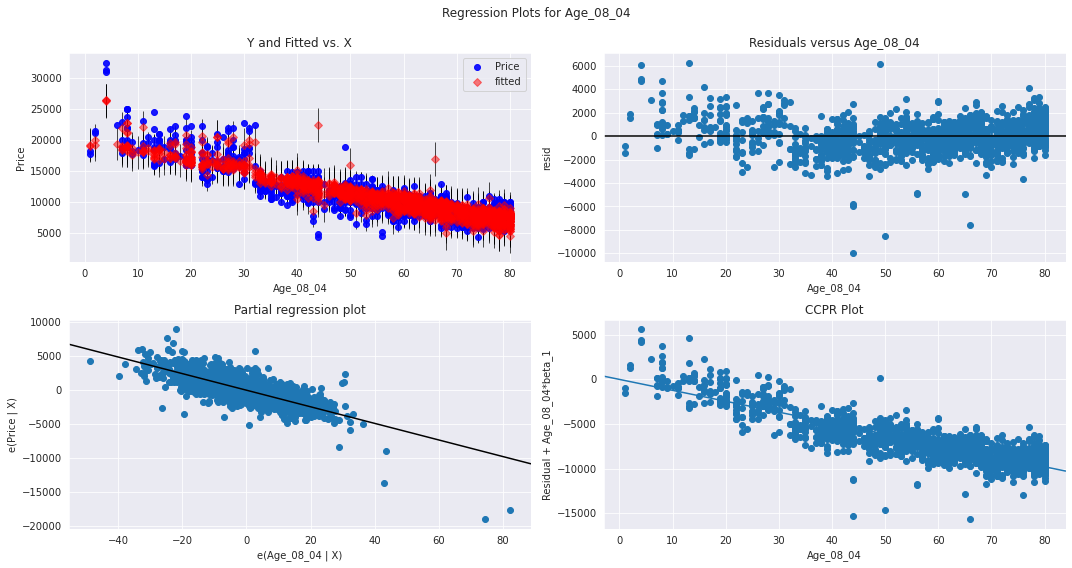

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

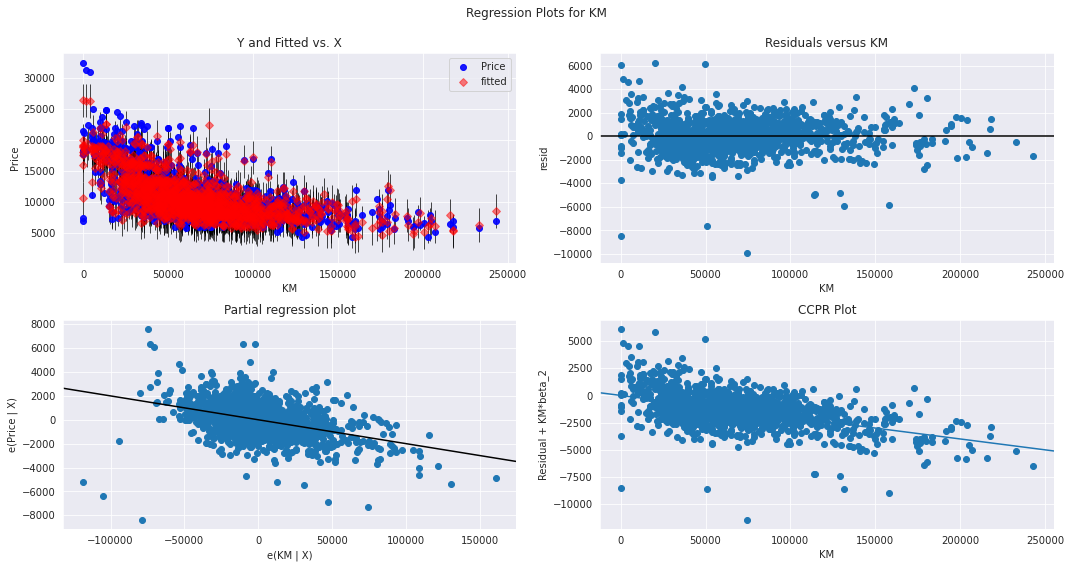

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

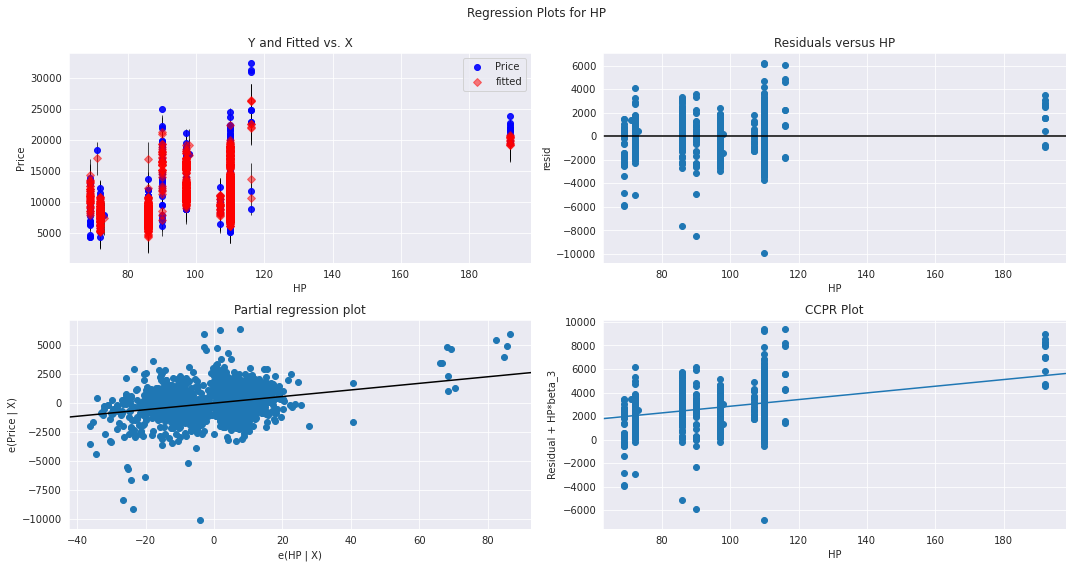

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

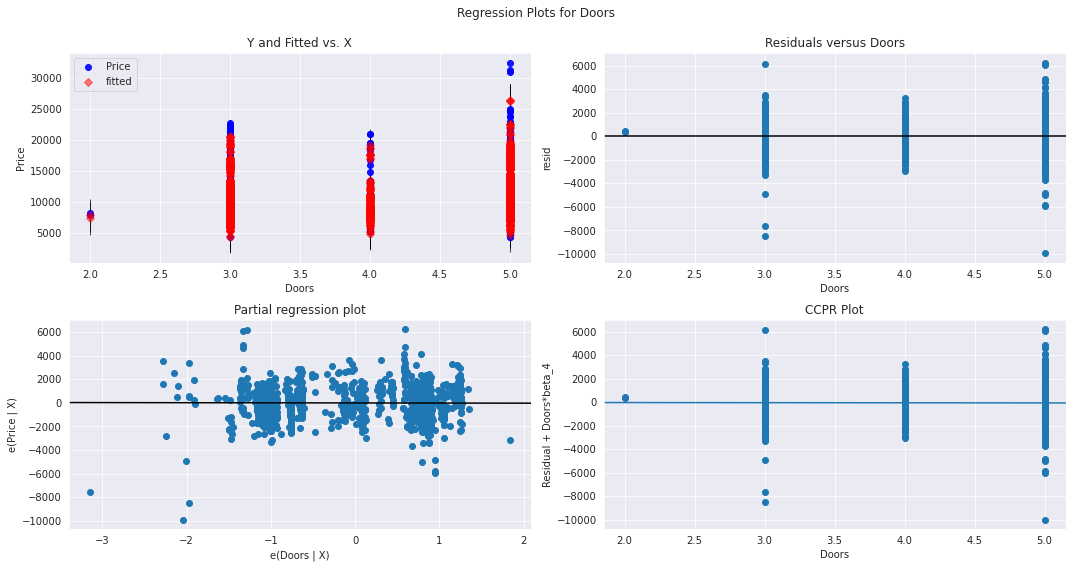

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

ValueError: specify slope and intercepty or model_results

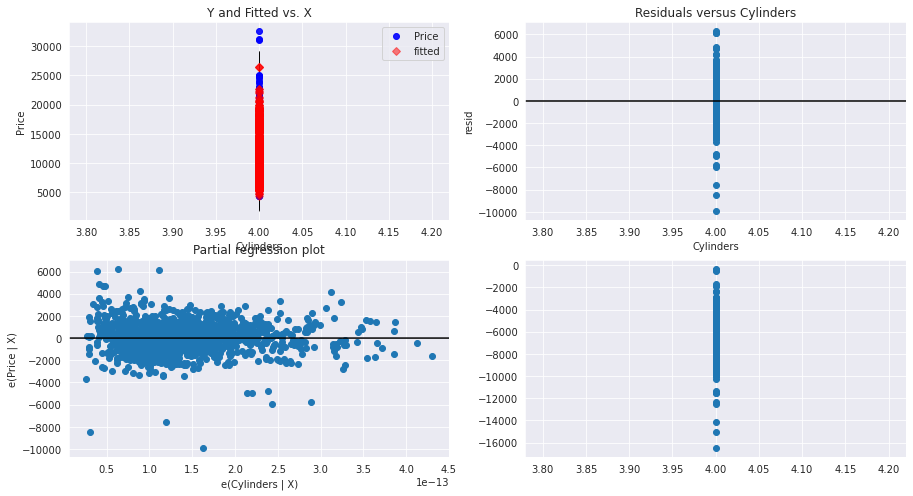

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Cylinders", fig=fig)
plt.show()

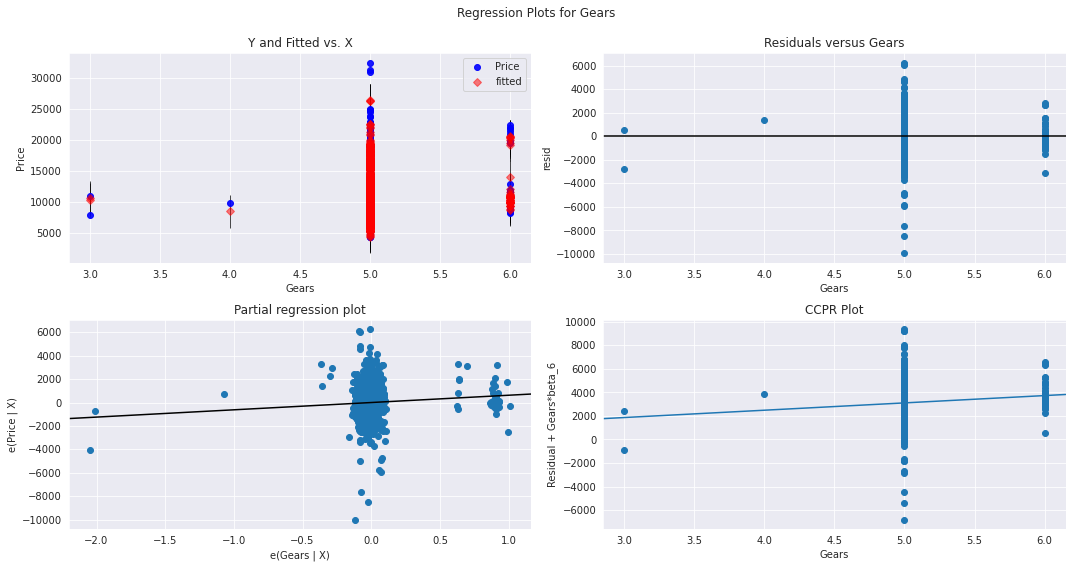

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

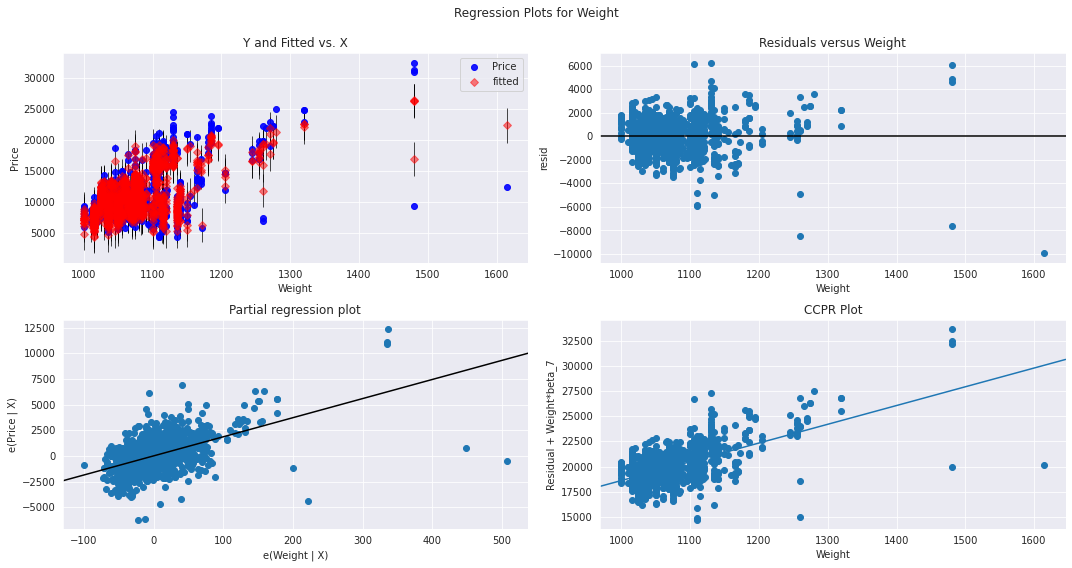

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [45]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

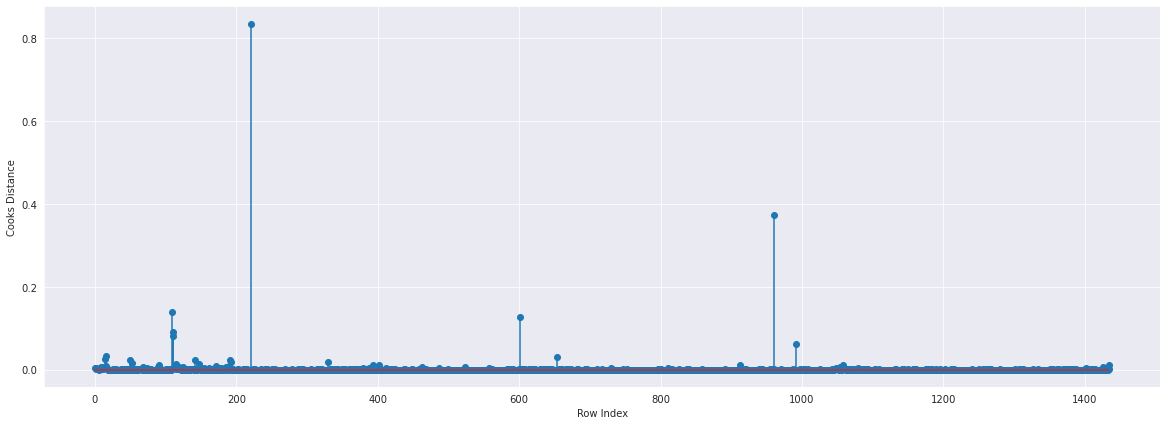

In [48]:
# PLot the influence values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyoto)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
# Index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(221, 0.8359007508853962)

## High Influence points

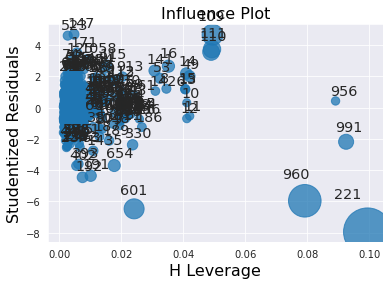

In [52]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [53]:
k = toyoto.shape[1]
n = toyoto.shape[0]
leverage_cutoff = 3*((k + 1)/n)

## from the above plot, it is evident that data point 221 and 960 are the influencers

In [56]:
toyoto[toyoto.index.isin([221, 960])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
960,964,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480


In [60]:
# See the difference in Price and the other value 
toyoto.head(15)

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90,3,4,5,1170
6,7,ÊTOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,94612,90,3,4,5,1245
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,75889,90,3,4,5,1245
8,9,ÊTOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,19700,192,3,4,5,1185
9,10,ÊTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,71138,69,3,4,5,1105


# Improving the model

In [61]:
# Read the Data
toyoto_new=pd.read_csv("/home/aman/Downloads/Data science material/Multiple regression/Toyoto_Corrola.csv")

In [62]:
# Discard the data point which are influencers and redesign the row number (reset_index())
toyoto1= toyoto_new.drop(toyoto_new.index[[221,960]], axis=0).reset_index()

In [65]:
# Drop the original index
toyoto1= toyoto1.drop(['index'], axis=1)

In [94]:
toyoto1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


# Build a model

In [90]:
# Build a final model
final_ml= smf.ols('Price~Age_08_04+KM++HP+Doors+Cylinders+Gears+Weight', data=toyoto1).fit()

In [91]:
(final_ml.rsquared, final_ml.aic)

(0.8728201848607587, 24633.588496856977)

# Cook's distance

In [92]:
model_influence = final_ml.get_influence()
(c, _) = model_influence.cooks_distance

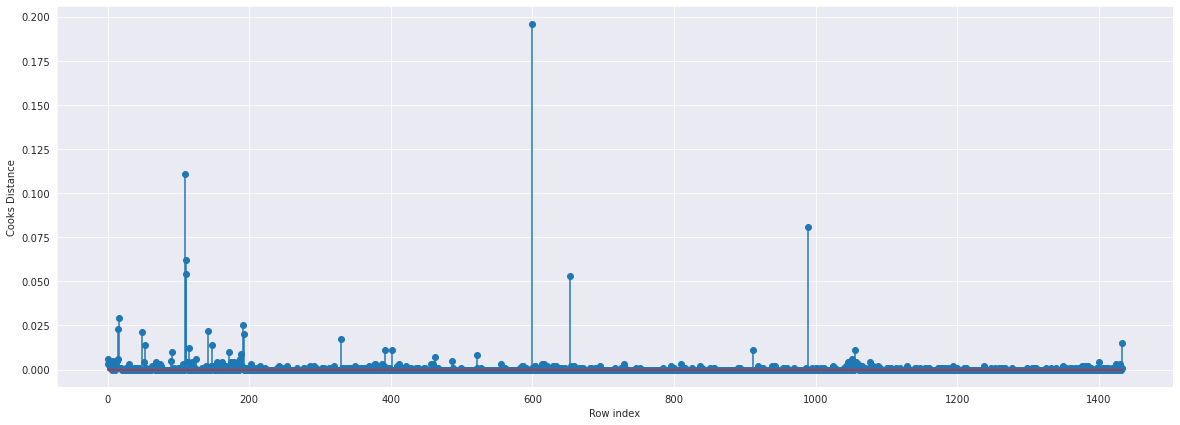

In [93]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyoto1)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [95]:
#Check the accuracy of the model
final_ml = smf.ols('Price~Age_08_04+KM++HP+Doors+Cylinders+Gears+Weight', data=toyoto1).fit()

In [96]:
(final_ml.rsquared, final_ml.aic)

(0.8728201848607587, 24633.588496856977)

# Predicting for new data

In [105]:
# New data for prediction
new_data= pd.DataFrame({'Age_08_04':20,'KM':38000,'HP':105, 'Doors':4,'Cylinders':3, 'Gears':5,'Weight':1200}, index=[1])


In [106]:
final_ml.predict(new_data)

1    21077.047558
dtype: float64

In [109]:
final_ml.predict(toyoto_new.iloc[0:5])

0    16845.895540
1    16284.225530
2    16844.069819
3    16475.963779
4    16330.059996
dtype: float64

In [110]:
pred_y = final_ml.predict(toyoto_new)

In [111]:
pred_y

0       16845.895540
1       16284.225530
2       16844.069819
3       16475.963779
4       16330.059996
            ...     
1431     8824.533880
1432     8285.039160
1433     8443.974918
1434     8562.134356
1435    10998.006839
Length: 1436, dtype: float64